## Uploading Data & Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# מייבאים את המודול yfinance להורדת נתוני מניות
import yfinance as yf
# מייבאים את הפונקציה לחלק את הנתונים לאימונים ולבדיקות
from sklearn.model_selection import train_test_split
# מייבאים את מודל XGBoost לרגרסיה
from xgboost import XGBRegressor
# מייבאים את matplotlib לצורך יצירת גרפים
import matplotlib.pyplot as plt
# מייבאים את StandardScaler לנרמול הנתונים
from sklearn.preprocessing import StandardScaler
# מייבאים את pandas לצורך ניהול מסגרות נתונים
import pandas as pd
# מייבאים את numpy לצורך עבודה עם מערכים
import numpy as np
# מייבאים את matplotlib.dates לצורך עיצוב תאריכים בגרפים
import matplotlib.dates as mdates



# # רשימת הסימולים של המניות (תוקנה, הוסר מחרוזת ריקה)
tickers_df = pd.read_csv("/content/drive/Shareddrives/capstone project-stock market liquidity/Symbols.csv")
tickers = tickers_df['0'].tolist()

# # הורדת נתוני המניות בין התאריכים 01-01-2016 עד 01-09-2024
data = yf.download(tickers, start="2020-01-01", end="2024-09-10")['Adj Close']
data

[**********************74%***********            ]  377 of 510 completedERROR:yfinance:Could not get exchangeTimezoneName for ticker '???.TA' reason: 'chart'
[*********************100%***********************]  510 of 510 completed
ERROR:yfinance:
6 Failed downloads:
ERROR:yfinance:['HDHA.TA', 'UNVO.TA', 'UNCR.TA', '???.TA', 'PMCN.TA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
ERROR:yfinance:['LURO.TA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2020-01-01 -> 2024-09-10) (Yahoo error = "Data doesn\'t exist for startDate = 1577829600, endDate = 1725915600")')


Ticker      ???.TA     ABRA.TA     ACCL.TA     ACKR.TA  ACRO.TA     ADGR.TA  \
Date                                                                          
2020-01-01     NaN  209.965805   50.000000         NaN      NaN  706.308472   
2020-01-02     NaN  218.123596   54.200001         NaN      NaN  704.812744   
2020-01-05     NaN  212.685104   51.900002         NaN      NaN  704.314209   
2020-01-06     NaN  202.099396   33.299999         NaN      NaN  696.835571   
2020-01-07     NaN  210.742798   51.400002         NaN      NaN  695.423035   
...            ...         ...         ...         ...      ...         ...   
2024-09-03     NaN  256.399994  108.099998  505.700012   4452.0  450.299988   
2024-09-04     NaN  255.500000  106.800003  502.600006   4485.0  454.100006   
2024-09-05     NaN  255.500000  106.800003  502.600006   4485.0  454.100006   
2024-09-08     NaN  251.600006  105.400002  515.599976   4522.0  449.000000   
2024-09-09     NaN  253.600006  104.000000  503.600006   4515.0  447.700012   

Ticker           AFHL.TA       AFPR.TA       AFRE.TA  AICS-M.TA  ...  XTLB.TA  \
Date                                                             ...            
2020-01-01  13049.062500  14303.131836   8221.657227     11.000  ...    0.046   
2020-01-02  12860.983398  14372.277344   8281.221680     11.550  ...    0.048   
2020-01-05  12475.870117  14224.109375   8322.584961     11.250  ...    0.046   
2020-01-06  12045.976562  14085.818359   8151.335938     11.050  ...    0.045   
2020-01-07  12126.582031  14332.765625   8196.009766     10.750  ...    0.045   
...                  ...           ...           ...        ...  ...      ...   
2024-09-03   9515.000000  16430.000000  22755.990234      6.874  ...    0.099   
2024-09-04   9515.000000  16360.000000  22994.585938      6.874  ...    0.099   
2024-09-05   9515.000000  16360.000000  22994.585938      6.874  ...    0.099   
2024-09-08   9185.000000  16990.000000  23153.648438      6.875  ...    0.097   
2024-09-09   9213.000000  17020.000000  23322.654297      6.875  ...    0.099   

Ticker        YAAC.TA    YBOX.TA  YBRD.TA       YHNF.TA       ZMH.TA  \
Date                                                                   
2020-01-01  41.237598  72.882301  11060.0  15143.166016  1640.811523   
2020-01-02  40.750198  72.386497  10850.0  15272.299805  1642.481934   
2020-01-05  42.115002  71.692398  10980.0  15272.299805  1639.976562   
2020-01-06  41.432598  71.196602  11020.0  15237.864258  1648.326660   
2020-01-07  41.432598  73.774696  10790.0  15410.045898  1638.306274   
...               ...        ...      ...           ...          ...   
2024-09-03  37.700001  79.000000   1564.0  21835.251953  2748.389648   
2024-09-04  36.299999  77.300003   1564.0  21835.251953  2735.430176   
2024-09-05  36.299999  77.300003   1564.0  21835.251953  2735.430176   
2024-09-08  36.000000  75.000000   1559.0  21875.005859  2746.395752   
2024-09-09  36.000000  74.599998   1571.0  21845.189453  2773.311523   

Ticker          ZNKL.TA     ZOOZ.TA  ZPRS.TA       ZUR.TA  
Date                                                       
2020-01-01  1338.669067         NaN      NaN  1118.365601  
2020-01-02  1397.089111         NaN      NaN  1131.820801  
2020-01-05  1399.938599         NaN      NaN  1141.318237  
2020-01-06  1417.749756         NaN      NaN  1125.488892  
2020-01-07  1370.728882         NaN      NaN  1102.535767  
...                 ...         ...      ...          ...  
2024-09-03  3674.000000  715.099976   1291.0   602.668274  
2024-09-04  3695.000000  711.000000   1286.0   604.211853  
2024-09-05  3695.000000  711.000000   1286.0   604.211853  
2024-09-08  3690.000000  685.200012   1316.0   608.333862  
2024-09-09  3725.000000  688.900024   1292.0   610.793945  

[1155 rows x 510 columns]

## Missing Data

Visualizing missing values using missingno:


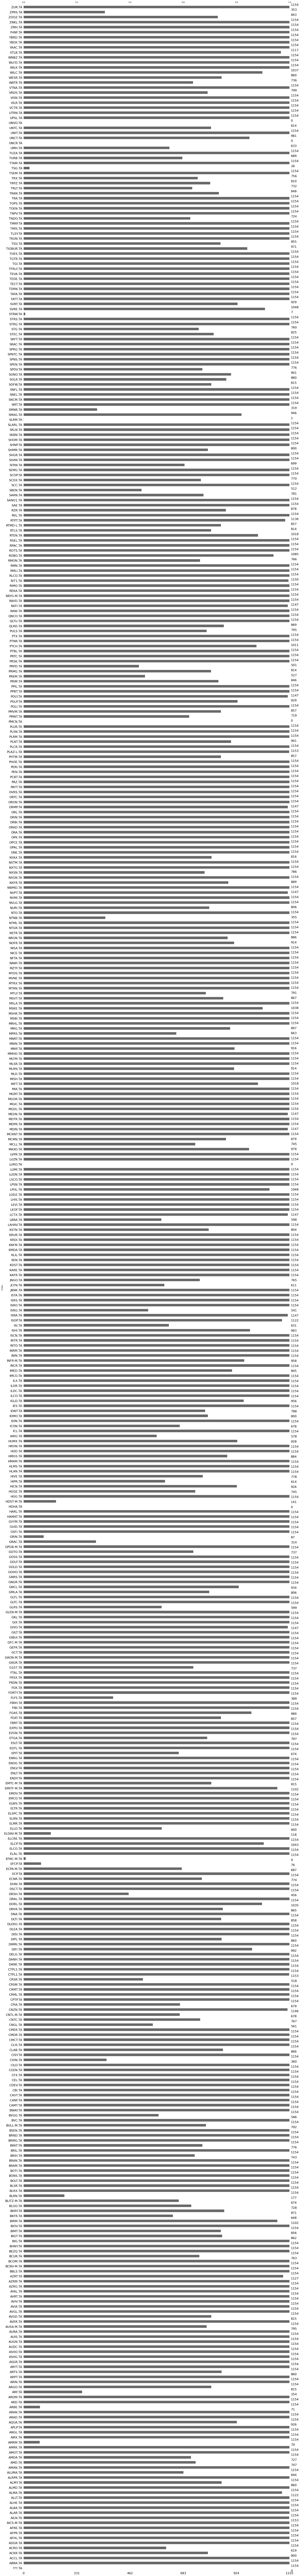

In [ ]:
import missingno as msno

# Use missingno to visualize missing values
print("Visualizing missing values using missingno:")
msno.bar(data)  # Bar chart showing null counts
plt.show()



In [ ]:
# Choose a specific column, for example 'Column_Name'
column_name = 'VISN.TA'

# Find the index of rows where the value in the column is NaN
nan_indices = data[data[column_name].isnull()].index

# Print the indices
print(f"Rows with NaN values in column '{column_name}':")
print(nan_indices)

visn_2_weeks = data.loc["2024-04-01":"2024-04-15", "VISN.TA"]
visn_2_weeks

Rows with NaN values in column 'VISN.TA':
DatetimeIndex(['2024-04-07'], dtype='datetime64[ns]', name='Date', freq=None)


Date
2024-04-01    3800.00
2024-04-02    3693.00
2024-04-03    3693.00
2024-04-04      36.93
2024-04-07        NaN
2024-04-08    3693.00
2024-04-09    3693.00
2024-04-10    3693.00
2024-04-11    3693.00
2024-04-14    3693.00
2024-04-15    3572.00
Name: VISN.TA, dtype: float64

In [ ]:
data.loc["2024-04-07"].isna().sum()

473

In [ ]:
data.loc["2024-04-07"] = data.loc["2024-04-07"].fillna(method="bfill")

<ipython-input-29-5b9b345f3ca9>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.loc["2024-04-07"] = data.loc["2024-04-07"].fillna(method="bfill")


In [ ]:
data.loc["2024-04-07"].isna().sum()

9

In [ ]:
# Choose a specific column, for example 'Column_Name'
column_name = 'VISN.TA'

# Find the index of rows where the value in the column is NaN
nan_indices = data[data[column_name].isnull()].index

# Print the indices
print(f"Rows with NaN values in column '{column_name}':")
print(nan_indices)

visn_2_weeks = data.loc["2024-04-01":"2024-04-15", "VISN.TA"]
visn_2_weeks

Rows with NaN values in column 'VISN.TA':
DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)


Date
2024-04-01    3800.000000
2024-04-02    3693.000000
2024-04-03    3693.000000
2024-04-04      36.930000
2024-04-07      37.689999
2024-04-08    3693.000000
2024-04-09    3693.000000
2024-04-10    3693.000000
2024-04-11    3693.000000
2024-04-14    3693.000000
2024-04-15    3572.000000
Name: VISN.TA, dtype: float64

In [ ]:
zur_2_weeks = data.loc["2024-04-01":"2024-04-15", "ZUR.TA"]
zur_2_weeks

Date
2024-04-01    587.297058
2024-04-02    581.971863
2024-04-03    582.332886
2024-04-04    574.841614
2024-04-07           NaN
2024-04-08    600.254272
2024-04-09    596.984924
2024-04-10    584.094299
2024-04-11    557.379028
2024-04-14    552.334839
2024-04-15    549.345642
Name: ZUR.TA, dtype: float64

In [ ]:
data["ZUR.TA"] = data["ZUR.TA"].fillna(method="bfill")

<ipython-input-33-bd0eda0ce587>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data["ZUR.TA"] = data["ZUR.TA"].fillna(method="bfill")


In [ ]:
zur_2_weeks = data.loc["2024-04-01":"2024-04-15", "ZUR.TA"]
zur_2_weeks

Date
2024-04-01    587.297058
2024-04-02    581.971863
2024-04-03    582.332886
2024-04-04    574.841614
2024-04-07    600.254272
2024-04-08    600.254272
2024-04-09    596.984924
2024-04-10    584.094299
2024-04-11    557.379028
2024-04-14    552.334839
2024-04-15    549.345642
Name: ZUR.TA, dtype: float64

In [ ]:
nan_columns_2024_04_07 = data.loc["2024-04-07"][data.loc["2024-04-07"].isna()].index
print("Columns with NaN values on 2024-04-07:", nan_columns_2024_04_07.tolist())

Columns with NaN values on 2024-04-07: ['YAAC.TA', 'YBOX.TA', 'YBRD.TA', 'YHNF.TA', 'ZMH.TA', 'ZNKL.TA', 'ZOOZ.TA', 'ZPRS.TA']


In [ ]:
for column in nan_columns_2024_04_07:
    data[column] = data[column].fillna(method="bfill")

<ipython-input-36-d45c3fcd8b11>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[column] = data[column].fillna(method="bfill")


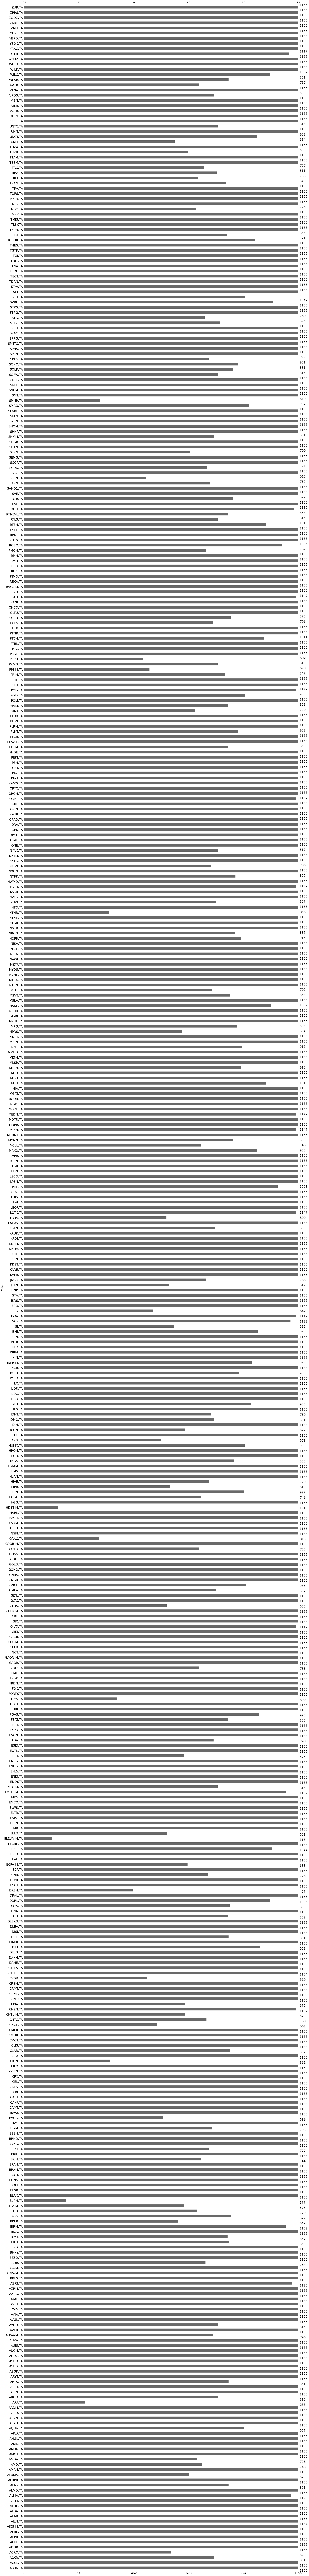

In [ ]:
msno.bar(data)  # Bar chart showing null counts
plt.show()

In [ ]:
# import seaborn as sns
# # Assuming 'data' is your DataFrame with the stock data
# plt.figure(figsize=(12, 10))
# sns.heatmap(data.select_dtypes("number").corr(), annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Heatmap')
# plt.show()

In [ ]:
data.shape

(1155, 496)

In [ ]:
# Getting rid off of stocks with less than 100 days
data = data.dropna(axis=1, thresh=100)
data.shape


(1155, 496)

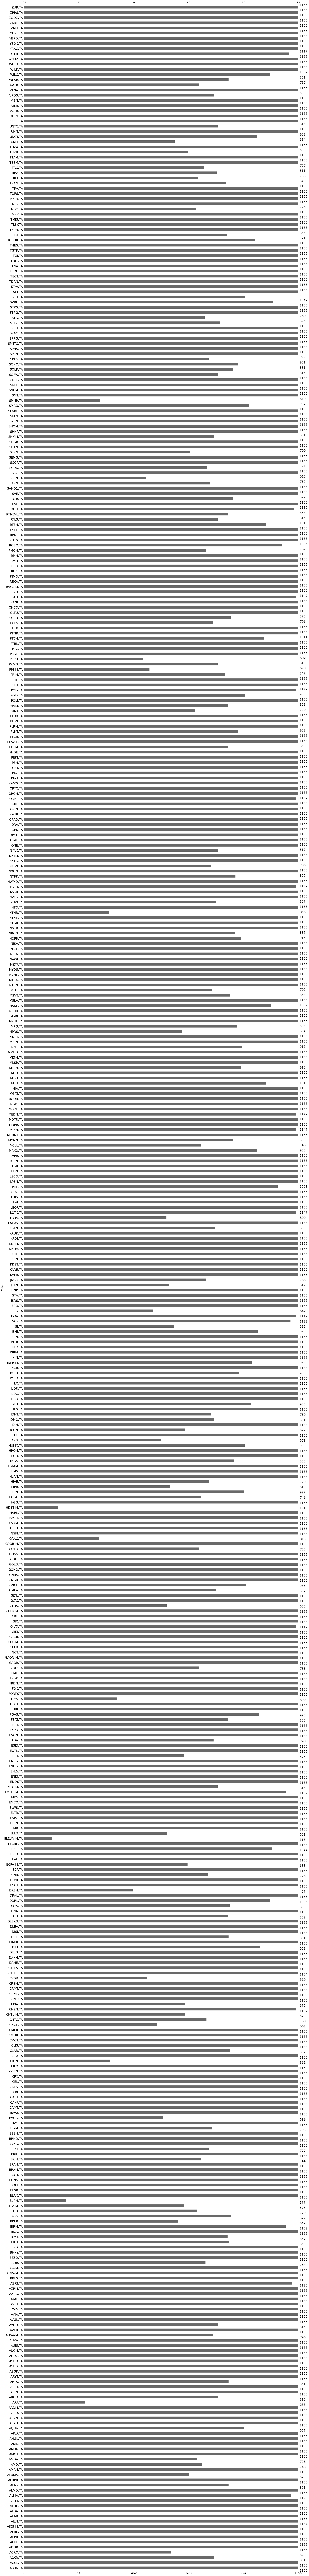

In [ ]:
msno.bar(data)  # Bar chart showing null counts
plt.show()

In [ ]:
data["ARBE.TA"].isna().sum()

KeyError: 'ARBE.TA'

## Feature Engineering

In [ ]:
# פונקציה לציור גרף המציג את המחירים בפועל מול המחירים החזויים
def plot_actual_vs_predicted(data, y_test, pred, model_name='Model'):
    plt.figure(figsize=(16, 8))  # הגדרת גודל הגרף

    # ודא שהאינדקס של הנתונים הוא בפורמט תאריך
    data.index = pd.to_datetime(data.index)

    # ציור המחירים בפועל (בכחול) והמחירים החזויים (באדום)
    plt.plot(data.index[-len(y_test):], y_test, label='Actual', color='blue', linewidth=2)
    plt.plot(data.index[-len(y_test):], pred, label='Predicted', color='red', linewidth=2)
    plt.fill_between(data.index[-len(y_test):], y_test, pred, color='gray', alpha=0.3)  # אזור הצללה בין תחזית למחירים בפועל

    plt.xlabel('Date', fontsize=14)  # תווית ציר X
    plt.ylabel('Price', fontsize=14)  # תווית ציר Y
    plt.title(f'{model_name}: Actual vs Predicted Prices Over Time', fontsize=16)  # כותרת הגרף
    plt.legend(fontsize=12)  # הוספת אגדה

    # עיצוב ציר ה-X לתצוגת תאריכים
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())

    plt.gcf().autofmt_xdate()  # סידור אוטומטי של התאריכים
    plt.tight_layout()  # התאמת הגרף לחלון התצוגה
    plt.grid(True, linestyle='--', alpha=0.7)  # הוספת רשת
    plt.show()
# יצירת ממוצעים נעים (Rolling windows) עם טיפול בנתוני NaN
for window in [2, 5, 10, 20, 60]:  # עבור חלונות של 2, 5, 10, 20 ו-60 ימים
    for ticker in tickers:  # עבור כל סמל במניות
        # ממוצע נע
        data[f'{ticker}_rolling_{window}'] = data[ticker].rolling(window=window).mean().fillna(method='ffill').fillna(method='bfill')
        # סטיית תקן נעה
        data[f'{ticker}_rollingSTD_{window}'] = data[ticker].rolling(window=window).std().fillna(method='ffill').fillna(method='bfill')
        # חציון נע
        data[f'{ticker}_rollingMedian_{window}'] = data[ticker].rolling(window=window).median().fillna(method='ffill').fillna(method='bfill')

# # הוספת ממוצע נע אקספוננציאלי עבור החלונות הבאים
# for window in [20, 50, 100, 200]:
#     for ticker in tickers:
#         data[f'{ticker}_ema_{window}'] = data[ticker].ewm(span=window, adjust=False).mean()


# מילוי ערכי NaN עם הערך הקודם או הבא
data.fillna(method='bfill', inplace=True)
data.fillna(method='ffill', inplace=True)

#data.to_csv('data.csv')  # שמירת הנתונים לאחר המילוי

Streaming output truncated to the last 5000 lines.
<ipython-input-18-8661db3b2083>:34: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[f'{ticker}_rollingMedian_{window}'] = data[ticker].rolling(window=window).median().fillna(method='ffill').fillna(method='bfill')
<ipython-input-18-8661db3b2083>:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[f'{ticker}_rollingMedian_{window}'] = data[ticker].rolling(window=window).median().fillna(method='ffill').fillna(method='bfill')
<ipython-input-18-8661db3b2083>:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data[f'{ticker}_rolling_

In [ ]:
data.shape

(1155, 8160)

### ABRA

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


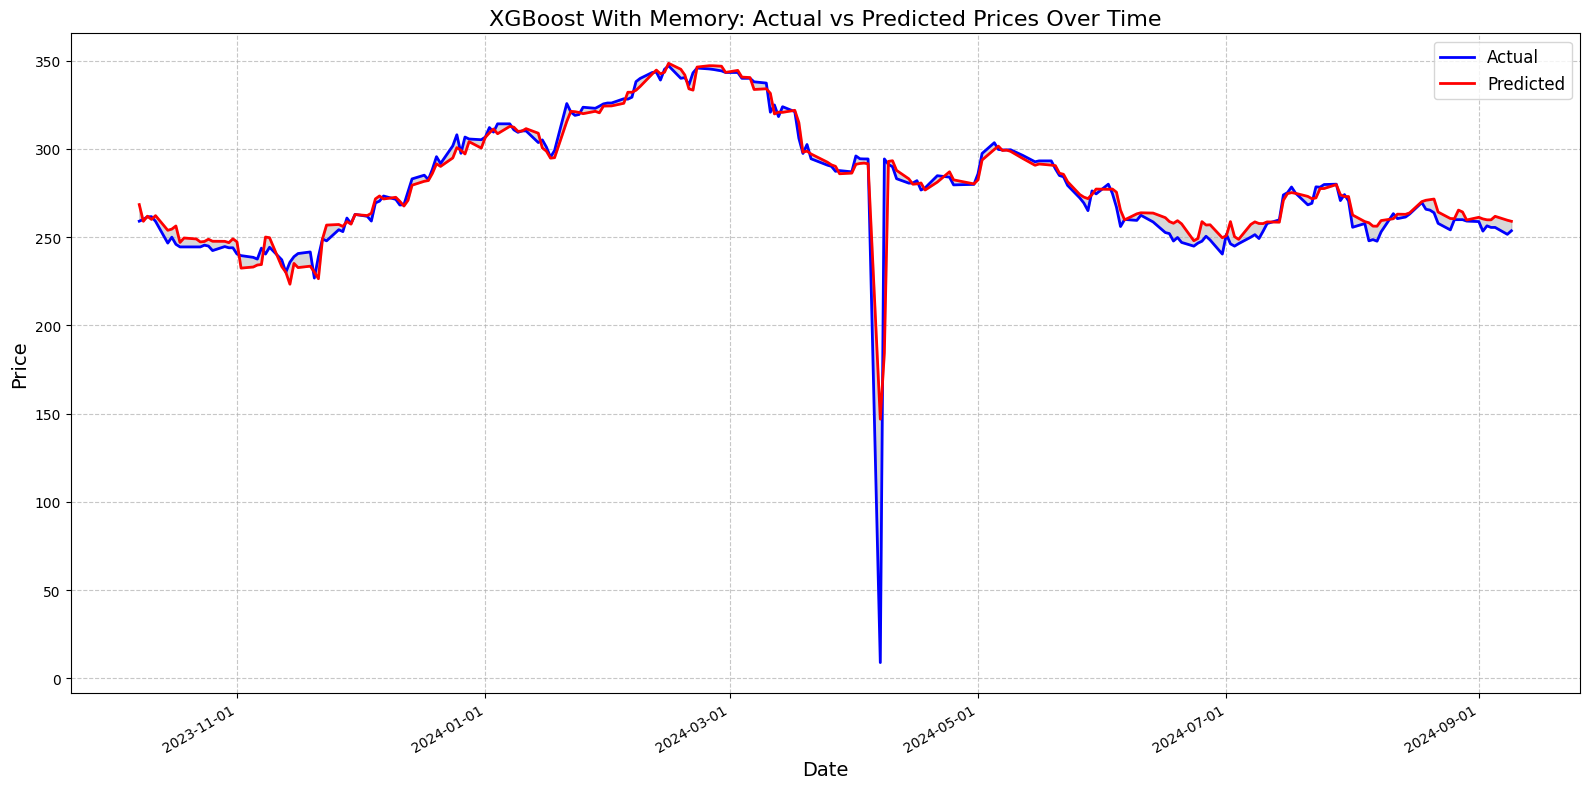

In [ ]:
# נרמול המשתנים הבלתי תלויים (X), פרט ל-BTC-USD
scaler_X = StandardScaler() #((X - M)/G)
X_scaled = pd.DataFrame(scaler_X.fit_transform(data.drop(columns=['ABRA.TA'])),
                        columns=data.columns.drop('ABRA.TA'),
                        index=data.index)

# המשתנה המוסבר (BTC-USD) ללא נרמול
y = data['ABRA.TA']

# חלוקת הנתונים לאימון ובדיקה (ללא ערבוב, כדי לשמור על סדר כרונולוגי)
X_train, X_test, y_train, y_test, train_dates, test_dates = train_test_split(
    X_scaled, y, X_scaled.index, test_size=0.2, random_state=42, shuffle=False)

# אימון מודל XGBoost עם 100 עצים, קצב למידה של 0.05, ועומק מקסימלי של 6
model = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# חיזוי מחירים על קבוצת הבדיקה
y_pred = model.predict(X_test)

# ציור גרף המציג מחירים בפועל מול תחזיות מודל XGBoost
plot_actual_vs_predicted(data, y_test, y_pred, model_name='XGBoost With Memory')


<Figure size 14000x12000 with 0 Axes>

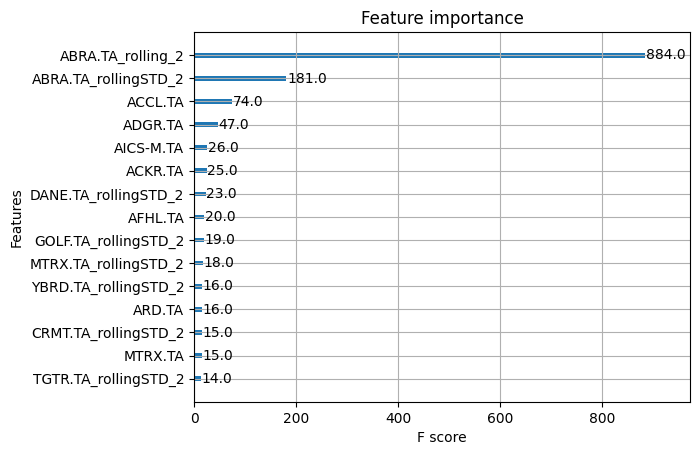

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(140, 120))
plot_importance(model,max_num_features=15)
plt.show()

In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print R-squared
print(f"R-squared: {r2}")


R-squared: 0.8799759980872696


### ARTS.TA

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


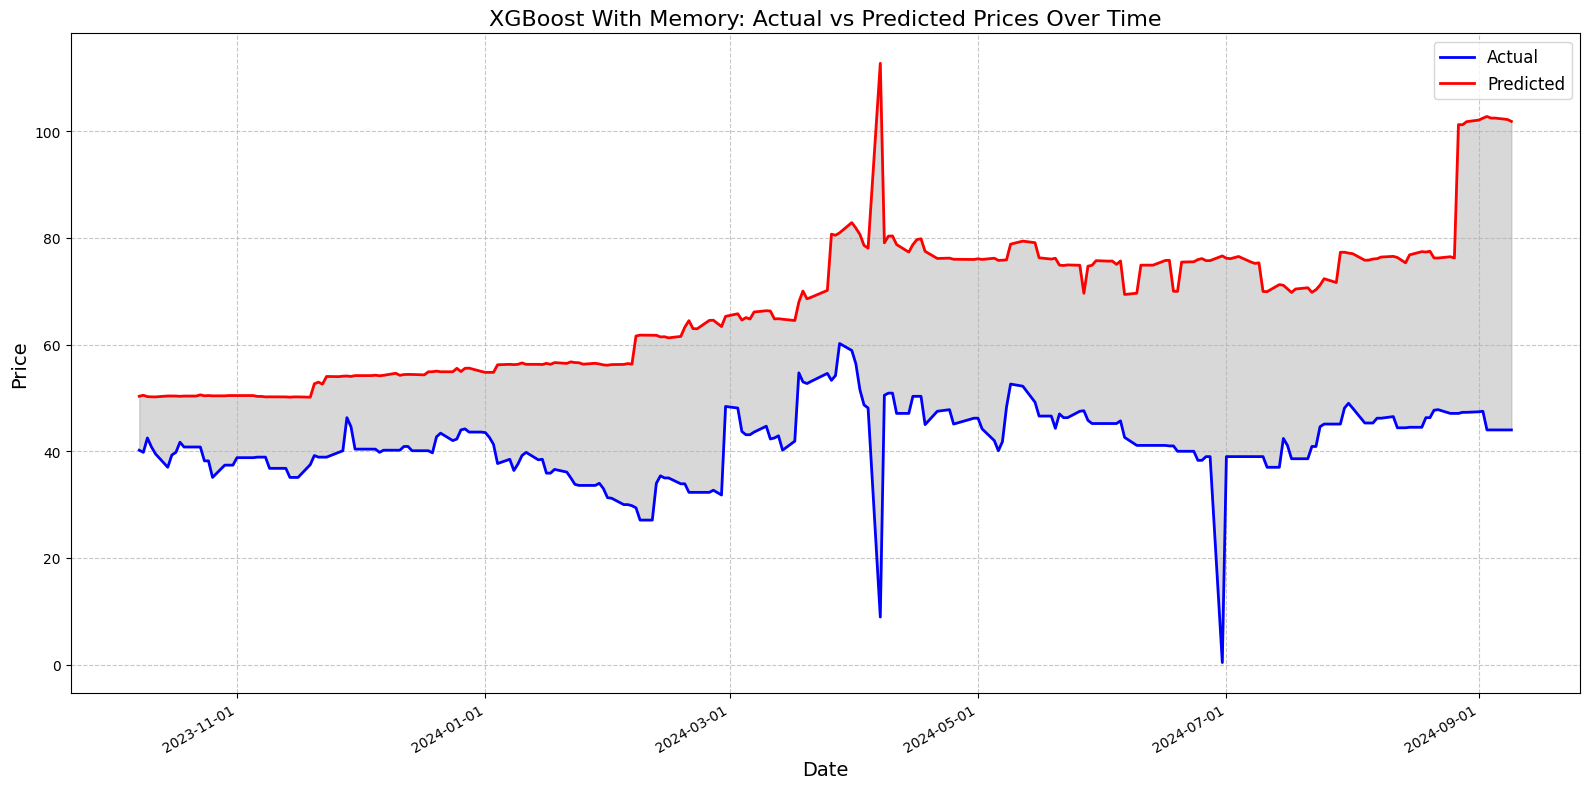

In [ ]:
# נרמול המשתנים הבלתי תלויים (X), פרט ל-BTC-USD
scaler_X = StandardScaler() #((X - M)/G)
X_scaled = pd.DataFrame(scaler_X.fit_transform(data.drop(columns=['ARTS.TA'])),
                        columns=data.columns.drop('ARTS.TA'),
                        index=data.index)

# המשתנה המוסבר (BTC-USD) ללא נרמול
y = data['ARTS.TA']

# חלוקת הנתונים לאימון ובדיקה (ללא ערבוב, כדי לשמור על סדר כרונולוגי)
X_train, X_test, y_train, y_test, train_dates, test_dates = train_test_split(
    X_scaled, y, X_scaled.index, test_size=0.2, random_state=42, shuffle=False)

# אימון מודל XGBoost עם 100 עצים, קצב למידה של 0.05, ועומק מקסימלי של 6
model = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# חיזוי מחירים על קבוצת הבדיקה
y_pred = model.predict(X_test)

# ציור גרף המציג מחירים בפועל מול תחזיות מודל XGBoost
plot_actual_vs_predicted(data, y_test, y_pred, model_name='XGBoost With Memory')


<Figure size 14000x12000 with 0 Axes>

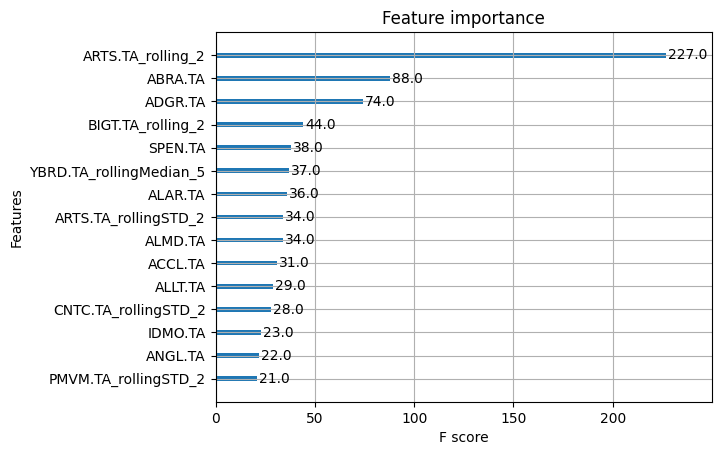

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(140, 120))
plot_importance(model,max_num_features=15)
plt.show()

In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print R-squared
print(f"R-squared: {r2}")


R-squared: -16.854237302544405


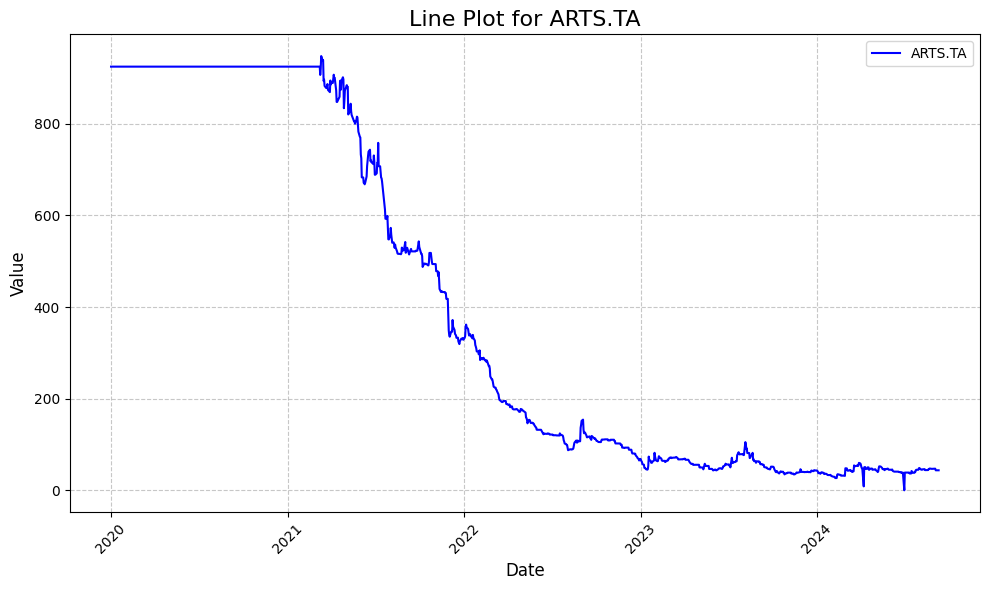

In [ ]:
import matplotlib.pyplot as plt

# Ensure the column exists in the DataFrame
if "ARTS.TA" in data.columns:
    # Create the line plot
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data["ARTS.TA"], label="ARTS.TA", color="blue")

    # Add title and labels
    plt.title("Line Plot for ARTS.TA", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Value", fontsize=12)

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45)

    # Add a grid and legend
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print("Column 'ARTS.TA' does not exist in the DataFrame.")


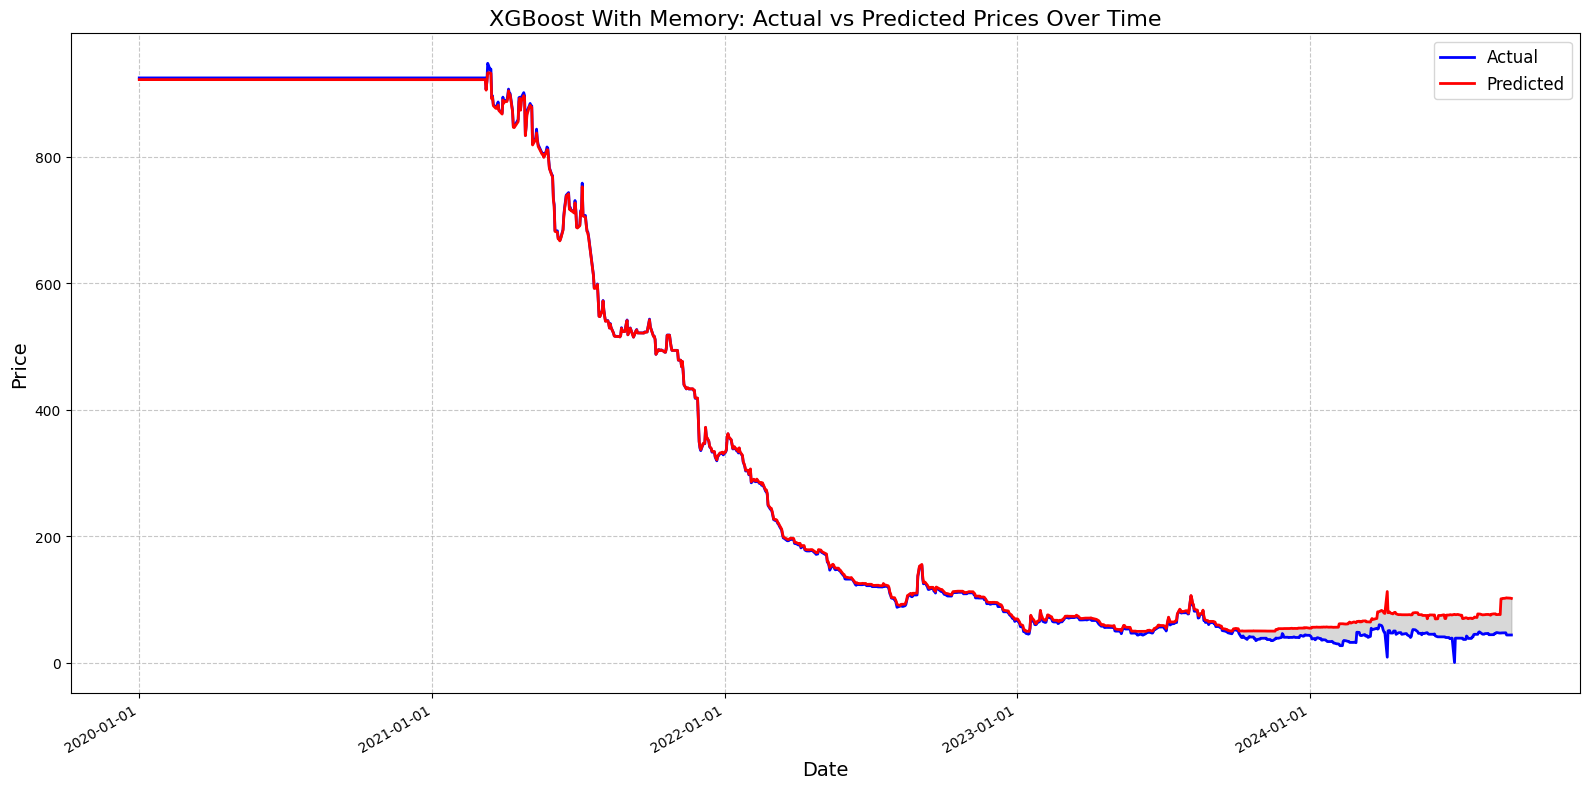

In [ ]:
# חיזוי מחירים על קבוצת הבדיקה
y_pred_2 = model.predict(X_scaled)

# ציור גרף המציג מחירים בפועל מול תחזיות מודל XGBoost
plot_actual_vs_predicted(data, y, y_pred_2, model_name='XGBoost With Memory')

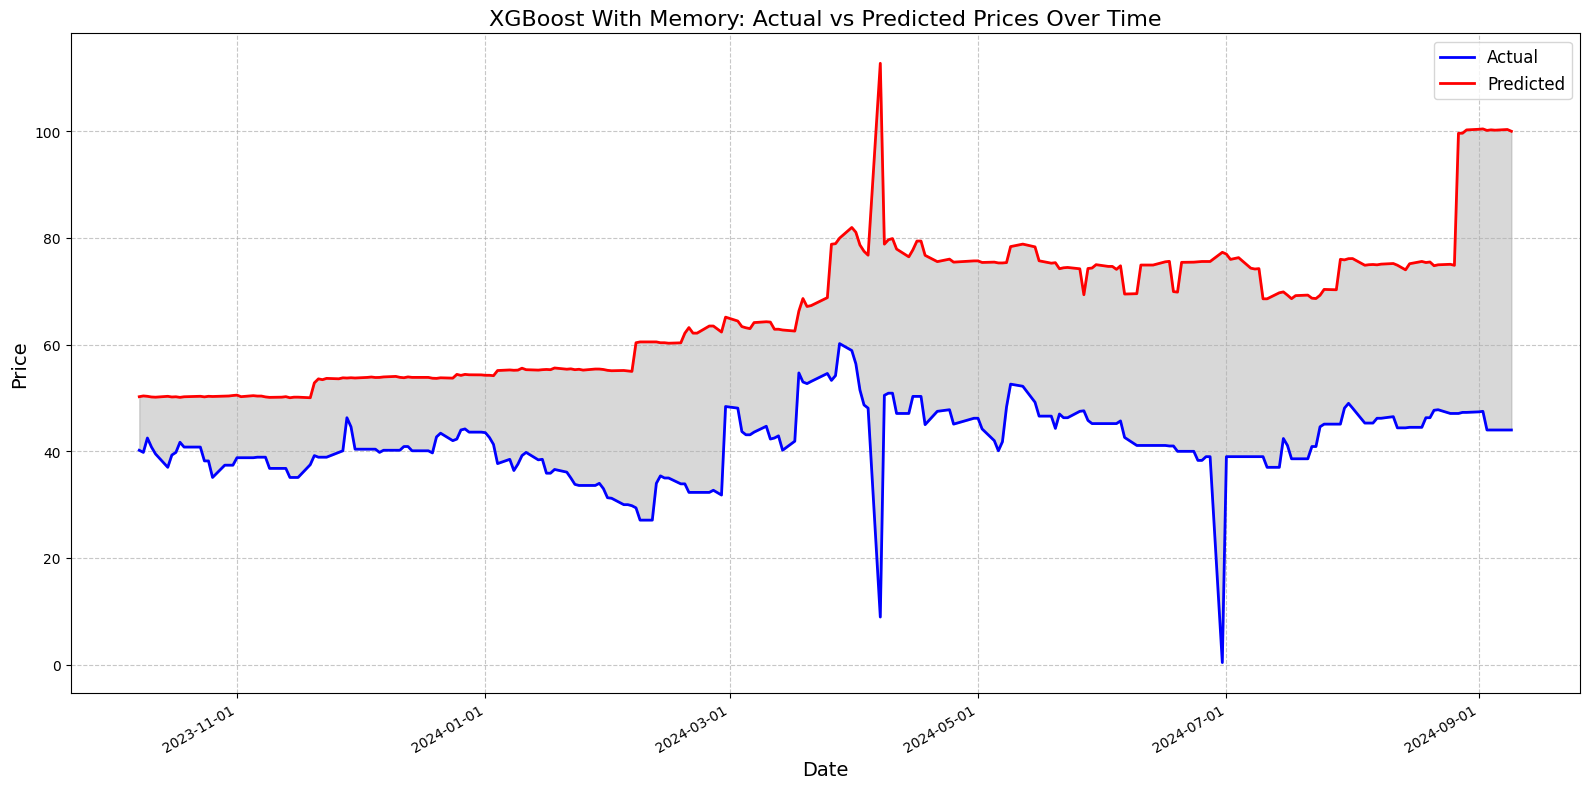

In [ ]:
# נרמול המשתנים הבלתי תלויים (X), פרט ל-BTC-USD

X_scaled = data.drop(columns=['ARTS.TA'])

# המשתנה המוסבר (BTC-USD) ללא נרמול
y = data['ARTS.TA']

# חלוקת הנתונים לאימון ובדיקה (ללא ערבוב, כדי לשמור על סדר כרונולוגי)
X_train, X_test, y_train, y_test, train_dates, test_dates = train_test_split(
    X_scaled, y, X_scaled.index, test_size=0.2, random_state=42, shuffle=False)

# אימון מודל XGBoost עם 100 עצים, קצב למידה של 0.05, ועומק מקסימלי של 6
model = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# חיזוי מחירים על קבוצת הבדיקה
y_pred = model.predict(X_test)

# ציור גרף המציג מחירים בפועל מול תחזיות מודל XGBoost
plot_actual_vs_predicted(data, y_test, y_pred, model_name='XGBoost With Memory')


In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# DO MAE, MSE, R^2


# Print R-squared
print(f"R-squared: {r2}")


R-squared: -15.843859659691581
